## Part 1: Genetic Regression Algorithm  

This portion of the assignment checks your understanding of Python code and algorithmic thinking. Your notebook contains a set of very poorly documented python functions. These functions attempt to use a genetic algorithm to find the regression line for a dataset by looking for the two coefficients of the line. For each function, you’ll write comments explaining what the function does step-by-step, and the roles they play in the genetic algorithm. You will have to spend a considerable amount of time playing with the code! Check out the Python tips section for helpful strategies.

### 1. Function Description [#algorithms, optimization]

#### 1.1 For each of the functions **A to E**, add in-line comments to explain what the code is doing line-by-line. In addition to in-line comments, write a few sentences that address the following points. (50-100 words per annotation).

* Identify the aspect of a genetic algorithm that the function pertains to and explain why this aspect is important for optimization.  

* Describe how the function accomplishes its task.  

* Specify the inputs, outputs, and any major data structures involved.  


#### 1.2 Missing function: Function F currently does nothing. Use a process of elimination to determine, then describe, which common element of a genetic algorithm is missing from this program and could become F. Detail why this element of the algorithm is important for finding an optimal solution. Then, fill in function F with working code that accomplishes this task and explain how it works.

#### 1.3 Be sure to also consider the “main program” portion of the code. Add comments and explain what this part does and how it connects to the functions.

In [108]:
### Genetic algorithm to fit a regression line of the form y=ax+b to a 2-variable dataset

# import the needed packages from the library
import random
import numpy as np

# load the data
# names the data in a variable to call it more easily
my_data_file = 'temp_data.npy' 
# loads the data from my_data_file to data
data = np.load(my_data_file) 

# parameters
initial_pop_size = 100 # the initial populations size
mutation_rate = 0.05 # the mutation rate in the chromosome
num_generations = 10  # the number of generations
chromosome_length = 2 # the length of chromosomes
num_survivors = 50 # the number of survivors in each generation

In [109]:

def A():
    # function A produces an evenly spaced 5000 elements array from the range[-1,80]
    gene_pool = np.linspace(-1,80,num = 5000)
    # describes the initial population's dimension
    dimensions = (initial_pop_size, chromosome_length)
    # return a random sample which is taken from gene_pool, with no replacement
    return np.random.choice(gene_pool, size=dimensions, replace=False)

**Function A**:
* Since, the genetic algorithms needs an initial population, this function generates the population that will be used for every evolution. As the evolutions happen, better solutions will be formed until the most optimal is found.
* This function produces a set of values that are evenly distributed between [-1,80], by using the product of initial population size and chromosome length.
* This function takes no input, and returns the array of initial population. Major data structure is lists/arrays.

In [110]:
def B(coefficients):
    # the number of training data points
    k = len(data)
    # the initial value of sum of squared residuals
    tot = 0
    # creates a loop to iterate for the dataset and add to the list
    for j in range(k):
        # the model equation, where data[j,0] represents x-value
        y = coefficients[0] * data[j,0] + coefficients[1]
        # finds the residuals for the given data
        res = data[j,1] - y
        # adds the squared-residuals to the prior list tot
        tot += res**2
        # returns the average of residuals
    return tot/k

**Function B:**
* This function is used to find the value of squared residuals in the dataset, because we need to minimize them to the least sum of squared residuals to have a better fitness line.
* The iteration is used to check over the training data and compare the output values with expected values, found from the equation y=ax+b. The residuals are squared and sumed up. The function, then, returns the average of residuals by dividing the total sum over the data size.
* The input is coefficients, the output is the average of the residuals (numerical value to measure the fitness of the function). The data structure used is arrays, the data type of the dataset.


In [111]:
def C():
    # starts an empty list of fit individuals
    fitlist = []
    # iterates in the range of the population
    for x in range(len(current_pop)):
        # adds the values and its errors (residuals)
        fitlist.append(np.array([x,B(current_pop[x])]))
        # prints the fit individuals list (fitness)
    return np.array(fitlist)

**Function C:**
* This function returns the fitness list from the current population, needed to find the best coefficients.
* This function uses the previous function B and the currrent population to add it to the fitness list.
* Fitness has no inputs, and it outputs the fitness list of the current population. The input is not needed becuase this function uses the current population in the iteration. The data structure is arrays/lists.

In [112]:
def D():
    # this variable stores random selection of number of survivors divided by two into an array, with no replacement
    random_selection = np.random.choice(range(len(fitness_vector)), num_survivors//2, replace=False)
    # the smallest residuals from the randomly selected numbers of survivors
    best = np.argmin(fitness_vector[random_selection,1])
    # finds the index number from the fitness_vector
    best_index = random_selection[best]
    # returns the value from the current population that has the fittest individuals
    return current_pop[int(fitness_vector[best_index][0])]    

**Function D:**
* This function is used to find the fittest individuals from randomly chosen group of the actual population. The population will perform better (evolve), by choosing the survivors.
* This function uses numpy for selecting individuals randomly, and finds the minimum value of errors in the random group. Then, it puts the information back to the actual population.
* Function D has no inputs. It returns the best value (fittest individuals) from the random group taken from current population. Data structure is lists/arrays.


In [113]:
def E():
    # find the genes to be duplicated
    duplicate_size = len(new_population) - len(survivors)
    # creates a new array of zeros 
    duplicate_survivors = np.zeros((duplicate_size, chromosome_length))
    # for each column in the survivor array
    for x in range(chromosome_length): 
        # duplicate column 4 times
        duplicate_survivors[:, x] = np.repeat(survivors[:, x], 4, axis=0) 
        # mixes randomly the column of duplicated survivors
        duplicate_survivors[:, x] = np.random.permutation(duplicate_survivors[:, x])
        # returns the duplicated survivors
    return duplicate_survivors

**Function E:**
* This function produces the randomly permuted list of duplicated survivors. The duplication happens as many times as needed, because the population that survives is smaller in size than the one that survived, therefore we need to fill out the space for the population that did not survive. It is randomly permuted to minimize the chance of randomness.
* The function first identifies the genes to be duplicated, and then it creates a new array of zeros. The iteration duplicates the survivors 4 times and it mixes them randomly. 
* This function has no inputs, and it outputs the randomly permuted list of duplicated survivors. The data structure is array.

In [114]:
def F(array): 
# the number of chromosomes to be mutated
    chromosomes_mutated = int(100*mutation_rate)
# iterate for the mutated chromosomes
    for i in range(chromosomes_mutated):
# randomly chooses the chromosome to be mutated
        mutation = np.random.randint(0, 250)
# change the first gene by choosing a random number from evenly distributed range
        array[mutation][0]= np.random.uniform(-1,80)
 # print(array[0])
    return array

**Function F:**
* This function is used to produce mutation. This function only chooses some chromosomes to change their first gene from initial value to another randomly chosen value from the range [-1,80].
* This function uses a for-loop to change the first gene in the range of the number of the chromosomes to be mutated. Therefore, random.randint from np is  used to produce a random number of the chromosomes to be mutated, and random.uniform is used to change the first gene of the chromosomes to be mutated.
* The input is the initial array, while the output is the mutated array. The major data structure used is arrays.

In [115]:
########################################################################
# Start of main program
current_pop = A()
# get the new population from function A
new_population = np.zeros((num_survivors * 5, chromosome_length))


# main loop
for i in range(num_generations):    
    # it assign an array to function C (fitness values)
    
    fitness_vector = C()
    # create an array filled with 0, which will be replaced by survivors
    survivors = np.zeros((num_survivors, chromosome_length))
    # iteration to choose one survivor per iteration
    for n in range(len(survivors)):
# selection of survivors
        survivors[n] = D()
# a portion of new populations is filled with survivors
    new_population[:len(survivors)] = survivors
# the other part of the new population is filled with randomly permuted chromosomes
    new_population[len(survivors):] = E()

# some chromosomes from the new population get mutated
    new_population = F(new_population)
# new population is assigned to current population, to create room for new generation    
    current_pop = new_population
# creates an array filled with 0, to replace it with chromosomes of new generation
    new_population = np.zeros((num_survivors * 5, chromosome_length))
# an array that contains a fitness scores for the last generation
fitness_vector = C()
# chooses the best chromosomes from the last generation, smallest ssr
best_solution = current_pop[np.argmin(fitness_vector[:,1])]
print("The best solution is", best_solution)
print("with error equal to approximately", B(best_solution))

The best solution is [ 0.31246249 67.99339868]
with error equal to approximately 70.98219540698614


**Description of the code:**

* This code uses 5 functions to produce a genetic algorithm, by training from the training data. 

    1. Firstly, it uses the Function A to initialize a population.
    2. Secondly, it uses Function C as the fitness population from the random group.
    3. Thirdly, it uses the Function D to find the parameters which have the least avergae of sum of squared of residuals (errors).
    4. Then it uses Function E to duplicate the survivors 5 times, because the population of survivors is smaller than the population of the agents that did not survive.
    5. It uses Function F to describe the mutation and children for the next generation. 

* At the end it outputs the best parameter and its error by using the help of the Function B to estimate the error.

In [116]:
# scipy regression function to compare with the genetic algorithm's solutions
from scipy import stats
print(stats.linregress(data)[0:2])

(0.5399259393210745, 70.70997220684585)


### 2. Overview [#optimization, #algorithms, #regression]

#### 2.1 Write a paragraph to explain what the parameters at the top of the script are. By experimenting with varying parameter values, determine what values produce solutions that are closest to the actual solution most efficiently. Why do you think this is?  [~200 words]





* The parameters are intial_pop_size, mutation_rate, num_generations, num_survivors and chromosome_length.
    1. initial_pop_size: describes the size of the population, which will be used in the algorithm (100, in this algorithm).
    2. mutation_rate: describes the rates of mutations from the parents that are expected to happen in the next generation. The mutation rate is set at default 5% to create diversity in the population. 
    3. num_generations: describes the number of the generations. Having a bigger number of the generations will produce more accurate outputs. 
    4. num_survivors: describes the number of the survivors that are selected from the previous generations. This defines how many "parents" survive and reproduce. Choosing the best fitness value is important to create a population that will survive with more individuals.
    5. chromosome_length: describes the length of the chromosome, the number of genes in one chromosome. In this case, it is 2 genes. This is why we use a linear regression model. 
* The values that produce solutions closest to the actual solution most efficiently are the ones closest to the actual data, because then, we will be able to find the global optimum with the smallest error rate.

    


#### 2.2 Write a paragraph that gives an overview of how this program solves the given task and what the output represents.  [~200 words]

This program is an example of genetic algorithm, which outputs the most optimal solution by using random population. It learns from trial and error, by trying the solutions and based on the error rate, it eliminates the bad solutions. It starts with a random gene pool. For every generation, it selects the individuals with least sum of squared residuals. Because the error rate is not 0 and the algorithm attempts the global optimum, some individuals with small least sum of squared residuals are killed as well as some with high least sum of squared residuals survive. After that selection, there is still a mutation rate for the "products/children" of the survivors. After many trials, the algorithm will be better at predicting the actual data and decreasing the error rate. The output of this algorithm is based on the linear regression model, outputing a and b (two coefficients, the coefficient for x and the slope coefficient), as well as the error of the model, which informs the overall performance of the algorithm.

### 3. Optional challenges (basic):

For any attempted optional challenge, also indicate which HC(s) you are applying and why your solution constitutes a strong application.

#### 3.1 Modify the program to include a visualization of how the error/fitness changes with each subsequent generation. Interpret this however you like, but make sure to include a detailed explanation.


Edit this cell to answer part 3.1


#### 3.2 Optimize the code: There are many aspects of the code that could be improved. Choose one part of the code and describe in as much detail as possible a way in which it can be optimized. Then, implement your optimization. Be clear about what you are optimizing for and how your proposal accomplishes this. 

Edit this cell to answer part 3.2

### 4. Optional challenges (more advanced):
For any attempted optional challenge, also indicate which HC(s) you are applying and why your solution constitutes a strong application.

#### 4.1 Modify the program to do multiple variable regression; that is, allow more predictor variables and find the regression equation that best fits the data. This needs to include first finding a dataset to test the program on and comparing the results of your algorithm to those that can be produced with a library regression function.


Edit this cell to answer part 4.1

#### 4.2 Write your own genetic algorithm from scratch to find the regression line for a two-variable dataset, using different data structures and different functions than the code provided. This requires thorough explanation, sufficiently detailed so that another student could understand your algorithm.




Edit this cell to answer part 4.2

#### 4.3 Write your own algorithm to find the line of best fit for a two-variable dataset using a perceptron. As above, the explanations of your code need to be sufficiently detailed so that another student could understand it.

Edit this cell to answer part 4.3

## Part 2: Lotka-Volterra Simulation

In this portion of the assignment, you will produce code that uses Euler’s method to implement a simulation of the solutions of the Lotka-Volterra equations. In addition to providing more practice in Python programming, this project challenges you to understand numerical methods for solving differential equations, which will lead to a deeper understanding of these models.

### 1. Simulation Code [#algorithms, #simulation, #variables, #dataviz]

Write code that inputs the initial ($t=0$) populations for predator and prey, parameter values, desired final output time, and time-step size ($h$), and outputs graphs of both predator and prey populations at each time-step on the same plot; final predicted population sizes for both predator and prey. 

* Write comments for each function you define, specifying inputs and outputs, along with a brief description of what the function does.
* Consider your initial parameter inputs. Explain how the result changes as you vary the initial parameters. Can you find a set of initial parameters that produce stable cyclic population dynamics? Explain the significance of this.

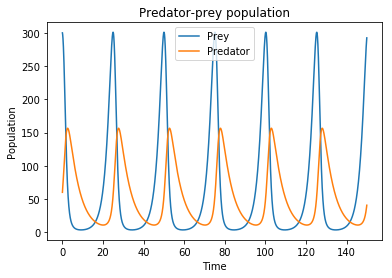

In [117]:
# import matplotlib to plot the function
import matplotlib.pyplot as plt
def LK_Simulation():
    init_predators= 60 # initial number of predators
    init_preys= 300 # initial number of preys
    a = 0.49 # alpha
    b = 0.009 # beta
    c = 0.199 # gamma
    d = 0.003 # delta  
    step_size = 0.01 # step size
    t_0 = 0 # initial time
    t_final = 150 # final time
    
    x = init_preys # x is assigned to initial prey population, as the first element in the list
    y = init_predators # y is assigned to initial predator population, as the first element in the list
    t = 0     
    time = [t] # create a list where we will store specific- updated times
    prey = [x] # create a list to store prey population size at each given time
    predator= [y] # create a list to store predator population  at each given time
    
    # iterate for the range of the number of steps
    for i in range(1, int(t_final/step_size)):
        # Euler's method
        # update time with the step-size
        t = t+step_size
        # update x by using the previous value of x
        x = x + step_size*(a*x-b*x*y)
        # update y by using the previous value of y
        y = y + step_size*(d*x*y-c*y)
        
        # add the population size of the prey at each step, in the list of preys
        prey.append(x) 
        # add predator population size at each step in the list of predators
        predator.append(y)
        # add the time at a step, to the list of time-steps
        time.append(t)
        # plot the number of preys in the function of times
    plt.plot(time, prey, label='Prey')
    # plot the number of predators in the function of times
    plt.plot(time, predator, label='Predator')
    # plot important data visualization tools
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Predator-prey population') 
    plt.legend()
    plt.show() 
# call the function
LK_Simulation()

**How to create a stable population?**

From changing the initial conditions, we can infer that the interactions between the prey and predator are significant to measure how stable the population will be at the end. For instance, if the death rate of the predators is big, and the interaction coefficients are small, the preys will survive. It is also to consider the initial population size, because having more predators than preys, will most likely end up in the predators surviving, regardless of the interactions.

### 2. Simulation Analysis [#simulation, #modeling]: 

Write a 500-word paper analyzing this simulation and comparing/contrasting it with the NetLogo Wolf Sheep Predation model from class. Address the following points in your write-up:

a) Are there any differences between the assumptions of the Lotka-Volterra model and the assumptions of your simulation? For example, consider whether the model and simulation are continuous or discrete.

b) How does your simulation contrast with an analytical approach to deriving the implications of the Lotka-Volterra model?

c) Compare and contrast your simulation with the NetLogo Wolf Sheep Predation simulation.

* Is each simulation stochastic or deterministic?
* Do they have differing assumptions?
* Do they give differing results?
* Which of them seems to be a more realistic representation of nature? Why?


**Lotka Volterra Simulation**:



* Assumptions: 
    The model I have used in this simulation is based on Lotka Volterra Mathematical Model. The differences rely on the time, which makes this model discrete but the other one continuous. Since in this model we use a step-size, we take values from specific ranges on time, therefore, this model is discrete. The smaller the step-size, the more accurate the model will be, but for the purposes of space and time we cannot choose "the smallest" step size. In continuous models, the accuracy is higher because it is taking into account every possible time. Considering that there is no randomness in this model, we can conclude that the model is deterministic and everytime we input the same variables values, the same output will be produced. 
* Differences with analytical approach:
    The simulation is not as accurate as the mathematical-derivative model. This model uses Euler's method which makes it produce numerical output compared to the differential equations which produce functions. Although with the differential equations we can find the accurate prediction of the nature at any given time, it takes a lot of time and effort to derive the functions. On the other hand, it is very easy to find close approximation by simulation of Euler's method in the computers, with a small step-size. Therefore, for practical solutions we use the simulations based on Euler's method.      
* This simulation compared to NetLogo Wolf Sheep Predation Simulation:
    Both NetLogo Model and this simulation are discrete. This simulation is deterministic because there is no randomness, thus, every time we put the same values in the initial conditions, we receive the same outcome. In the NetLogo Model, the initial positions are always assigned randomly, which makes it stochastic. The NetLogo Model takes into account more variables, which makes it more realistic compared to this model which uses only the population sizes and the interactions between them. This is why this model is not agent-based, in contrast to NetLogo.






In [118]:
# Edit this cell to give your answer
# Add more cells (code or markdown) as needed